In [58]:
# Pytorch in python can be accessed by Torch library
import torch

In [59]:
# Check current torch version
torch.__version__

'1.9.1'

In [60]:
# In case Nvidea Cuda available, this will give True as result else False
torch.cuda.is_available()

True

In [61]:
import torchvision
# transform is used to convert data into Tensor form with transformations
import torchvision.transforms as transforms

In [62]:
import torchvision
import torchvision.transforms as transforms

In [63]:
train_set = torchvision.datasets.MNIST(
root = './data',
train = True,
download = True,
transform = transforms.Compose([transforms.ToTensor()])
)

In [64]:
# Length of train set
len(train_set)

60000

In [65]:
# Lets study first image

img, label = train_set[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [66]:
def show_img(img, label):
    print('Label: ', label)
    plt.imshow(img.permute(1,2,0), cmap = 'gray')

In [67]:
# Without these libraries, we cant think of running any Data analysis related python program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Label:  0


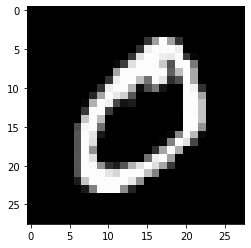

In [68]:
# lets observe some images
show_img(*train_set[1])

Label:  9


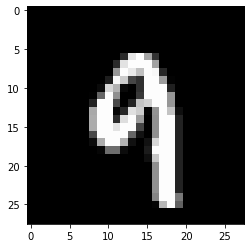

In [69]:
show_img(*train_set[19992])

In [70]:
trans = transforms.Compose([
    # To resize image
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    # To normalize image
    transforms.Normalize((0.5,), (0.5,))
])

In [71]:
train_set = torchvision.datasets.MNIST(
root = './data',
train = True,
download = True,
transform = trans
)

In [72]:
test_set = torchvision.datasets.MNIST(
root = './data',
train = False,
download = True,
transform = trans
)

In [73]:
len(train_set), len(test_set)

(60000, 10000)

In [74]:
img, label = train_set[0]
img.shape, label

(torch.Size([1, 32, 32]), 5)

Label:  5


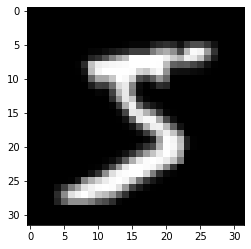

In [75]:
show_img(*train_set[0])

Label:  7


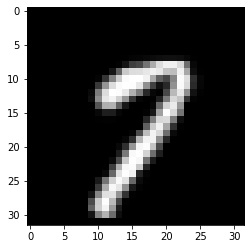

In [76]:
show_img(*train_set[9999])

Label:  7


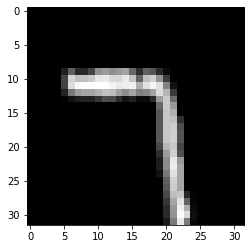

In [77]:
show_img(*test_set[5999])

In [78]:
# this function will generate random indexes between 0 and 59999
def split_indices(n, val_per, seed = 0):
    n_val = int(n * val_per)
    np.random.seed(seed)
    idx = np.random.permutation(n)
    return idx[n_val : ], idx[: n_val]

In [79]:
val_per = 0.2
rand_seed = 42

train_indices, val_indices = split_indices(len(train_set), val_per, rand_seed)

print(len(train_indices), len(val_indices))

48000 12000


In [80]:
# Lets plot some indexes

print("Validation Indices: ", val_indices[:20])
print("Training Indices: ", train_indices[:20])

Validation Indices:  [12628 37730 39991  8525  8279 51012 14871 15127  9366 33322 53390 21819
  5026 23428 45297 26354 30195 47038 20731 34047]
Training Indices:  [48572 38696 13611 35213 31766 57477  9165 21399 44113 55436 33761  2417
 10339 21794 59625 38542 10557  4120 46651 59905]


In [81]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [82]:
# this is one of Hyper parameter, but let's select given below value
batch_size = 512

In [83]:
# training data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(train_set, batch_size, sampler = train_sampler)

In [84]:
# validation dataloader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(train_set, batch_size, sampler = val_sampler)

In [85]:
from torchvision.utils import make_grid
# this will help us to create Grid of images

In [86]:
# We will select first 110 image from first batch of size = 512
def show_batch(dl):
    for img, label in dl:
        fig, ax = plt.subplots(figsize = (12,8))
        ax.imshow(make_grid(img[:110], 10).permute(1,2,0))
        break

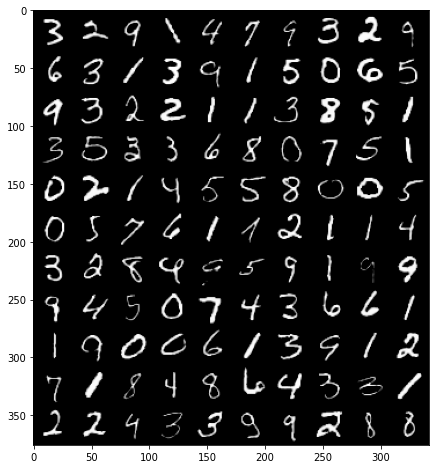

In [87]:
show_batch(val_dl)

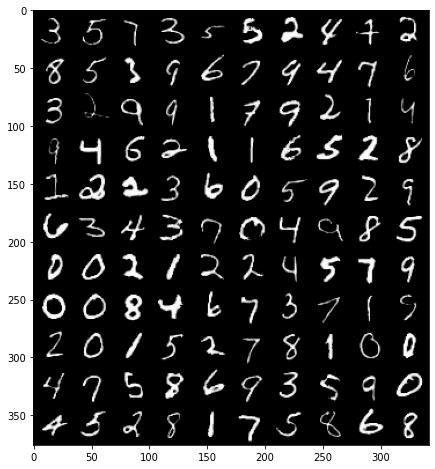

In [88]:
show_batch(train_dl)

In [89]:
import torch.nn as nn
import torch.nn.functional as F

This is how Yen LeKun has decribed and built First Neural network in 1988, that was probably first working Neural model

In [90]:
class LeNet5(nn.Module):
    
    def __init__(self, num_classes):
        
        super().__init__()
        
        self.num_classes = num_classes
        
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(6, 16, kernel_size = 5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size = 2)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, num_classes)  
        )
        
        
        
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logit = self.classifier(x)
        return logit

In [91]:
# Load Model
model = LeNet5(num_classes = 10)

In [92]:
model

LeNet5(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [93]:
sample = next(iter(train_set))
img = sample[0]
img.shape

torch.Size([1, 32, 32])

In [94]:
img.unsqueeze(0).shape
# Now we have [1, 1, 32, 32] shape of image

torch.Size([1, 1, 32, 32])

In [95]:
out = model(img.unsqueeze(0))
out

tensor([[-0.0093,  0.0344,  0.1548, -0.0796, -0.0564,  0.2128, -0.0401, -0.1171,
         -0.0526,  0.0836]], grad_fn=<AddmmBackward>)

In [96]:
# Output In terms of Probability
F.softmax(out)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[0.0973, 0.1016, 0.1146, 0.0907, 0.0928, 0.1215, 0.0943, 0.0873, 0.0932,
         0.1067]], grad_fn=<SoftmaxBackward>)

In [97]:
 # Demo function to test result

for images, labels in train_dl:
    print('Image Shape', images.shape)
    out = model(images)
    print('output shape', out.shape)
    print('out[0]', out[0])
    break

Image Shape torch.Size([512, 1, 32, 32])
output shape torch.Size([512, 10])
out[0] tensor([-0.0201, -0.0154,  0.1395, -0.0994, -0.0481,  0.1503, -0.0590, -0.1123,
         0.0192,  0.0724], grad_fn=<SelectBackward>)


In [98]:
probs = F.softmax(out[0], dim = 0)
probs

tensor([0.0974, 0.0978, 0.1142, 0.0899, 0.0947, 0.1155, 0.0937, 0.0888, 0.1013,
        0.1068], grad_fn=<SoftmaxBackward>)

In [99]:
m = torch.argmax(probs)
m

tensor(5)

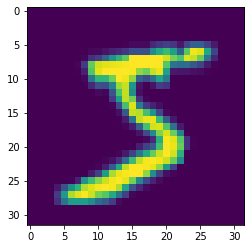

In [100]:
# Lets plot
plt.imshow(img.permute(1,2,0))

In [101]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [102]:
device = get_default_device()
device

device(type='cuda')

In [103]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

LeNet5(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [104]:
def loss_batch(model, loss_func, x, y, opt = None, metric = None):
    
    pred = model(x)
    
    loss = loss_func(pred, y)
    
    if opt is not None:
        
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    
    if metric is not None:
        
        metric_result = metric(pred, y)
        
    return loss.item(), len(x), metric_result

In [105]:
def evaluate(model, loss_fn, val_dl, metric = None):
    
    with torch.no_grad():
        
        results = [loss_batch(model, loss_fn, x, y, metric = metric) for x, y in val_dl]
        
        losses, nums, metrics = zip(*results)
        
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        
        avg_metric = None
        
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
    return avg_loss, total, avg_metric

In [106]:
def fit(epochs, model, loss_fn, train_dl, val_dl, opt_fn = None, metric = None, scheduler = None, scheduler_on = 'val_metric'):
    
    train_losses, val_losses, val_metrics, train_metrics = [], [], [], []
    
    
    for epoch in range(epochs):
        
        model.train()
        for x, y in train_dl:
            train_loss, _, train_metric = loss_batch(model, loss_fn, x, y, opt_fn, metric)
            
        model.eval()
        result = evaluate(model, loss_fn, val_dl, metric)
        val_loss, total, val_metric = result
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        train_metrics.append(train_metric)
        
        if metric is None:
            print('Epoch{}/{}, train_loss: {:.4f}, val_loss: {:.4f}' 
                 .format(epoch+1, epochs, train_loss, val_loss))
            
        else:
            print('Epoch {}/{}, train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}, train_{}: {:.4f}'
                 .format(epoch+1, epochs, train_loss, val_loss, metric.__name__, val_metric, metric.__name__, train_metric))
            
        if scheduler is not None:
            if scheduler_on == 'val_metric':
                scheduler.step(val_metrics[-1])
        
            
    return train_losses, val_losses, val_metrics, train_metrics

In [107]:
def accuracy(output, labels):
    _, preds = torch.max(output, dim = 1)
    
    return torch.sum(preds == labels).item() / len(preds)

In [108]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, val_dl, metric = accuracy)

print(val_loss, val_acc)

2.3174451923370363 0.09441666666666666


In [109]:
num_epochs = 25

optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.1, mode = 'max', verbose = True)

In [110]:
history = fit(num_epochs, model, F.cross_entropy, train_dl, val_dl, optimizer, accuracy, scheduler, 'val_metric')

Epoch 1/25, train_loss: 0.0921, val_loss: 0.1262, val_accuracy: 0.9617, train_accuracy: 0.9792
Epoch 2/25, train_loss: 0.0947, val_loss: 0.0787, val_accuracy: 0.9774, train_accuracy: 0.9688
Epoch 3/25, train_loss: 0.0581, val_loss: 0.0691, val_accuracy: 0.9795, train_accuracy: 0.9844
Epoch 4/25, train_loss: 0.0662, val_loss: 0.0547, val_accuracy: 0.9845, train_accuracy: 0.9766
Epoch 5/25, train_loss: 0.0394, val_loss: 0.0543, val_accuracy: 0.9841, train_accuracy: 0.9870
Epoch 6/25, train_loss: 0.0203, val_loss: 0.0512, val_accuracy: 0.9853, train_accuracy: 0.9948
Epoch 7/25, train_loss: 0.0748, val_loss: 0.0514, val_accuracy: 0.9862, train_accuracy: 0.9792
Epoch 8/25, train_loss: 0.0162, val_loss: 0.0473, val_accuracy: 0.9864, train_accuracy: 0.9922
Epoch 9/25, train_loss: 0.0211, val_loss: 0.0500, val_accuracy: 0.9863, train_accuracy: 0.9974
Epoch 10/25, train_loss: 0.0099, val_loss: 0.0484, val_accuracy: 0.9875, train_accuracy: 0.9974
Epoch 11/25, train_loss: 0.0062, val_loss: 0.0557

Text(0.5, 1.0, 'Plot between Training Loss vs Epochs')

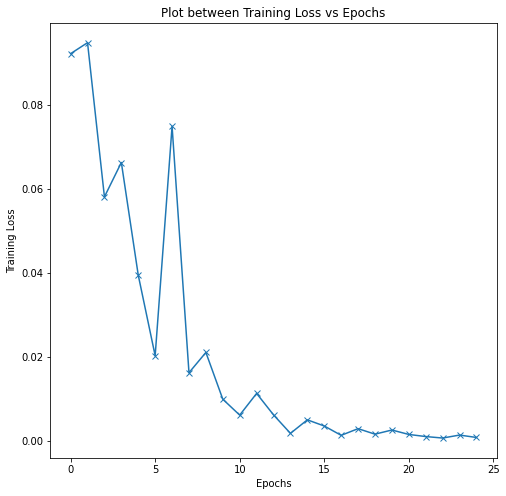

In [111]:
plt.figure(figsize = (8,8))
plt.plot(history[0], '-x')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Plot between Training Loss vs Epochs')

Text(0.5, 1.0, 'Plot between Validation Loss vs Epochs')

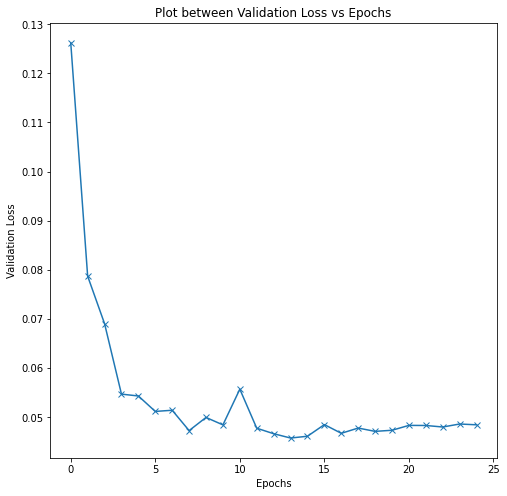

In [112]:
plt.figure(figsize = (8,8))
plt.plot(history[1], '-x')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Plot between Validation Loss vs Epochs')

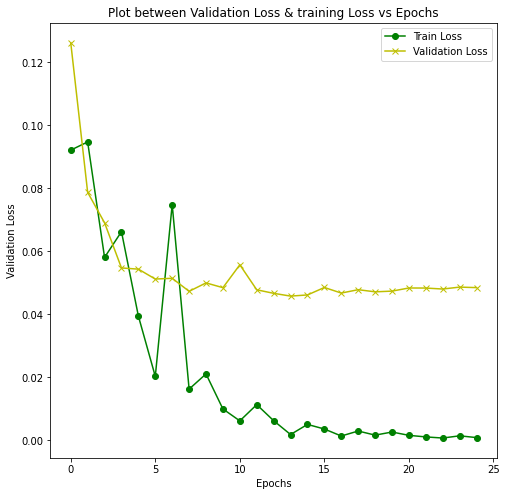

In [119]:
plt.figure(figsize = (8,8))
plt.plot(history[0], '-go')
plt.plot(history[1], '-yx')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Plot between Validation Loss & training Loss vs Epochs')
plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right')

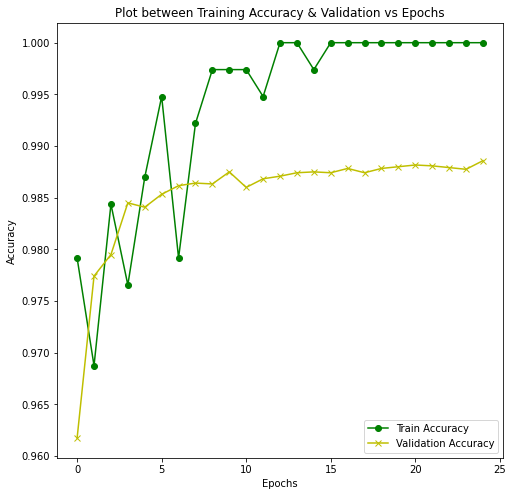

In [121]:
plt.figure(figsize = (8,8))
plt.plot(history[3], '-go')
plt.plot(history[2], '-yx')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot between Training Accuracy & Validation vs Epochs')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc = 'lower right')

In [122]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


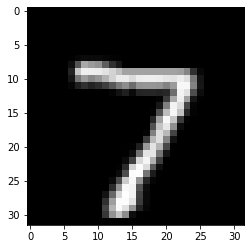

In [123]:
img, label = test_set[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Yippy!! That's Correct



Label: 2 , Predicted: 2


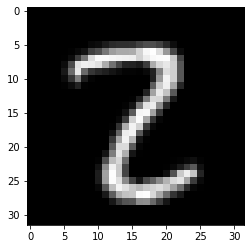

In [124]:
img, label = test_set[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


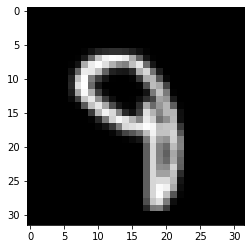

In [125]:
img, label = test_set[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


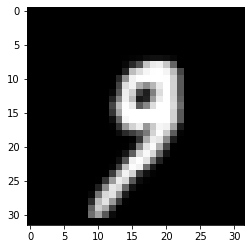

In [128]:
img, label = test_set[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [129]:
test_loader = DeviceDataLoader(DataLoader(test_set, batch_size=256), device)
result = evaluate(model, F.cross_entropy, test_loader, metric = accuracy)
result
Accuracy = result[2] * 100
Accuracy
loss = result[0]
print("Total Losses: {}, Accuracy: {}".format(loss, Accuracy))

Total Losses: 0.0417451271689526, Accuracy: 98.87
